In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 8.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [4]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 7.3MB/s 
     |████████████████████████████████| 9.5MB 16.8MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [5]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/TamilNadu1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth
0,2000,1,1,0,0,0,0,0,0,0,0,21,22.361598,951.069824,94.747772,166.221817,0
1,2000,1,1,1,0,0,0,0,0,0,0,21,22.113735,950.670105,94.587796,158.952849,0
2,2000,1,1,2,0,0,0,0,0,0,0,21,21.932924,950.084168,94.527398,146.731555,0
3,2000,1,1,3,0,0,0,0,0,0,0,20,21.802145,949.915283,94.564467,133.338946,0
4,2000,1,1,4,0,0,0,0,0,0,0,20,21.677566,950.238098,94.428675,119.610011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,0,0,0,0,0,0,23,23.942629,949.792664,95.038603,109.027520,0
131396,2014,12,31,20,0,0,0,0,0,0,0,22,23.816937,950.480530,95.051303,122.815953,0
131397,2014,12,31,21,0,0,0,0,0,0,0,22,23.651271,950.498596,95.063357,136.493751,0
131398,2014,12,31,22,0,0,0,0,0,0,0,22,23.463472,950.312073,94.849659,149.723659,0


In [6]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(10)

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth,Date
0,2000,1,1,0,0,0,0,0,0,0,0,21,22.361598,951.069824,94.747772,166.221817,0,2000-01-01 00:00:00
1,2000,1,1,1,0,0,0,0,0,0,0,21,22.113735,950.670105,94.587796,158.952849,0,2000-01-01 01:00:00
2,2000,1,1,2,0,0,0,0,0,0,0,21,21.932924,950.084168,94.527398,146.731555,0,2000-01-01 02:00:00
3,2000,1,1,3,0,0,0,0,0,0,0,20,21.802145,949.915283,94.564467,133.338946,0,2000-01-01 03:00:00
4,2000,1,1,4,0,0,0,0,0,0,0,20,21.677566,950.238098,94.428675,119.610011,0,2000-01-01 04:00:00
5,2000,1,1,5,0,0,0,0,0,0,0,16,18.991073,951.739258,88.086527,105.737471,0,2000-01-01 05:00:00
6,2000,1,1,6,0,0,0,0,0,0,0,16,19.082109,952.528564,86.906296,92.034323,0,2000-01-01 06:00:00
7,2000,1,1,7,0,78,302,138,71,355,141,17,20.282244,953.285584,81.499087,78.560168,0,2000-01-01 07:00:00
8,2000,1,1,8,0,147,468,341,117,611,370,17,22.268241,953.526489,73.018861,65.523141,0,2000-01-01 08:00:00
9,2000,1,1,9,0,184,587,535,143,737,584,17,23.986125,953.256287,66.480553,53.289244,0,2000-01-01 09:00:00


In [7]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
print(X.shape)

(131400, 1)


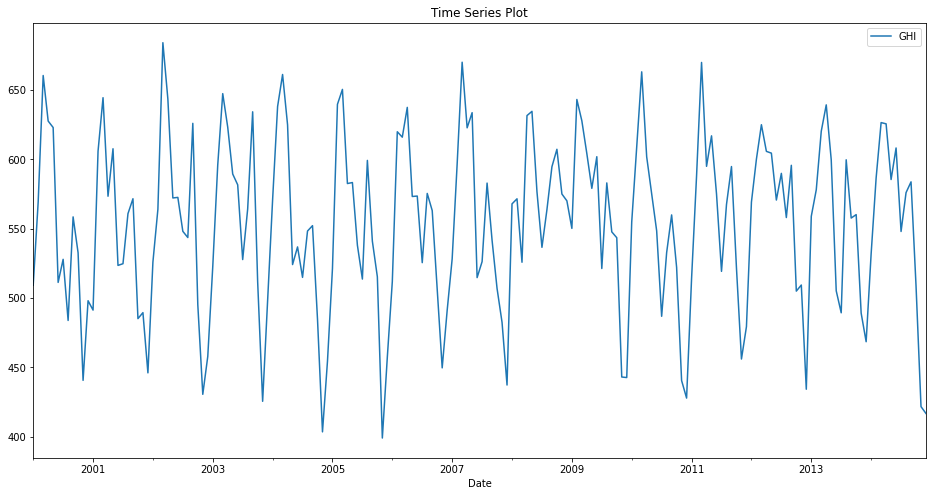

In [8]:
#y=X['GHI']
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
y=X.resample('M',on='Date').mean()
y=y.dropna()
#y=np.log(y+1)
del X
del df
y.plot(figsize=[16,8],title='Time Series Plot')

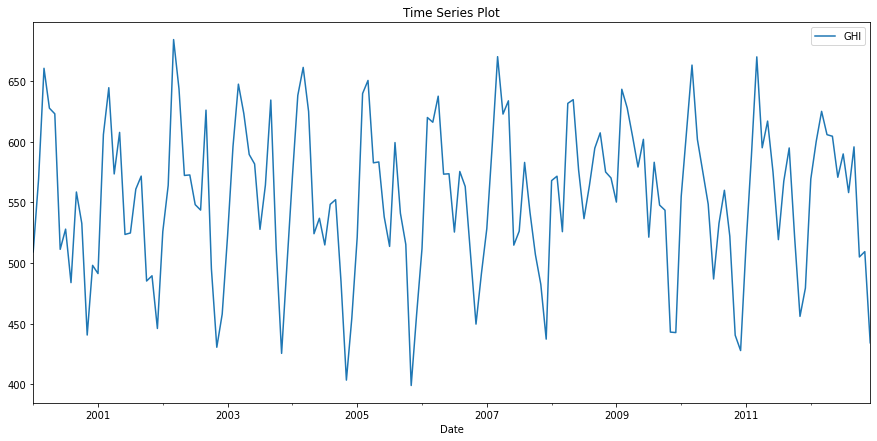

In [9]:
y[:'2012'].plot(figsize=[15,7],title='Time Series Plot')

In [10]:
X_train=y[:'2011']
X_test=y['2012':]

In [11]:
np.any(np.isnan(X_test))

False

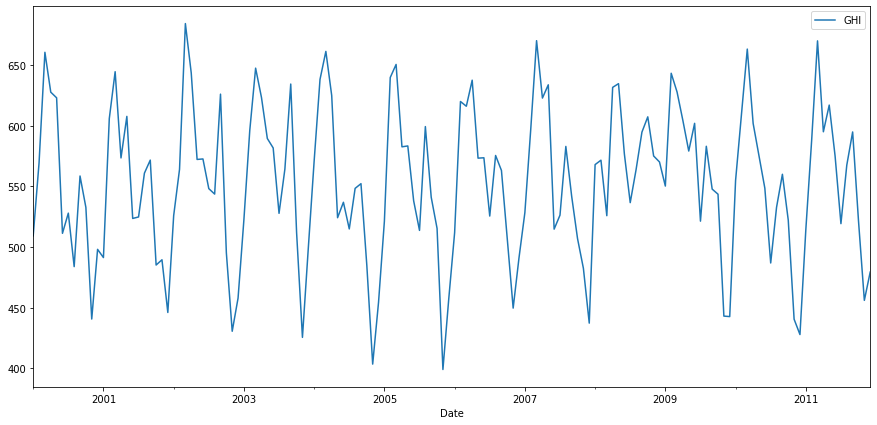

In [12]:
X_train.plot(figsize=(15,7))

In [13]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(X_train, start_p=0, start_q=0,max_p=1,max_d=1,max_q=1, d=1, m=12,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
stepwise_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1510.210, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1578.804, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1509.915, Time=0.50 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1549.316, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1576.806, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1580.685, Time=0.07 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1482.693, Time=0.84 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1551.917, Time=0.33 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=3.18 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=1.33 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=1524.002, Time=0.97 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=2.83 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=2.16 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 0, 1, 12)   Log Likelihood                -721.976
Date:                            Sun, 02 May 2021   AIC                           1455.952
Time:                                    18:23:11   BIC                           1473.729
Sample:                                         0   HQIC                          1463.176
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.001      0.188      0.851      -0.002       0.003
ma.L1         -0.9828      0.073    -13.516      0.000      -1.125      -0.840
ar.S.L12       1.0912      0.011     95.554      0.000       1.069       1.114
ar.S.L24      -0.0943      0.013     -7.040      0.000      -0.121      -0.068
ma.S.L12      -0.8829      0.149     -5.931      0.000      -1.175      -0.591
sigma2      1182.6902    133.178      8.881      0.000     921.666    1443.714
===================================================================================
Ljung-Box (L1) (Q):                   6.69   Jarque-Bera (JB):                 9.94
Prob(Q):                              0.01   Prob(JB):                         0.01
Heteroskedasticity (H):               1.67   Skew:                             0.15
Prob(H) (two-sided):                  0.08   Kurtosis:                         4.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
stepwise_model.fit(X_train)
#print(stepwise_model.summary())

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 0, 1, 12),
      suppress_warnings=True)

In [15]:
X_test.shape

(36, 1)

In [16]:
pred=stepwise_model.predict(n_periods=36)

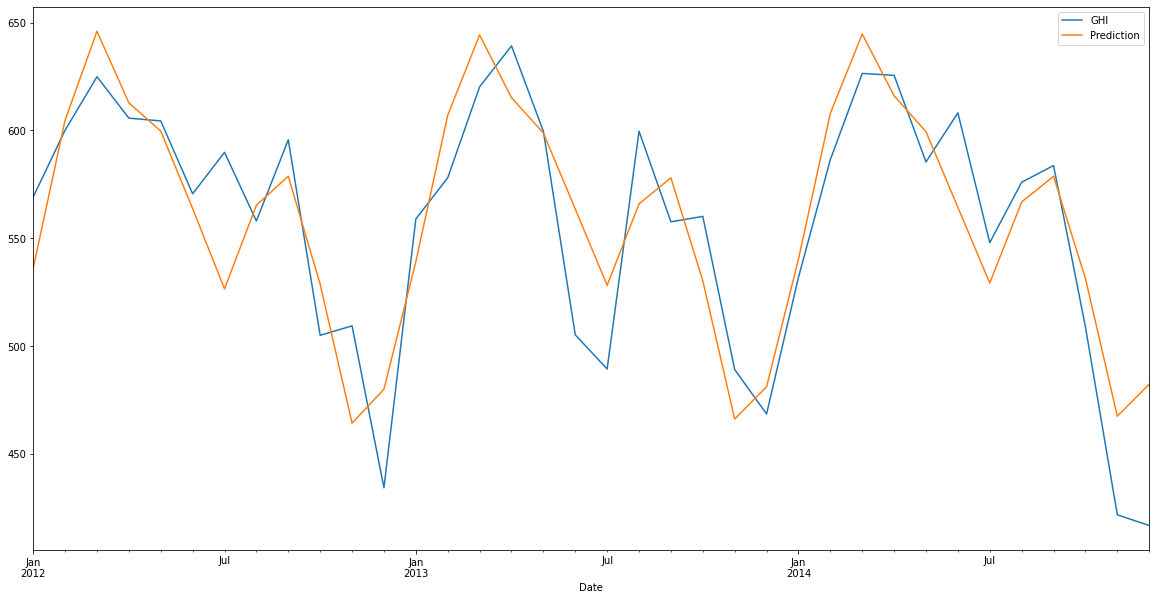

In [17]:
pred = pd.DataFrame(pred,index = X_test.index,columns=['Prediction'])
pd.concat([X_test,pred],axis=1).plot(figsize=(20,10))

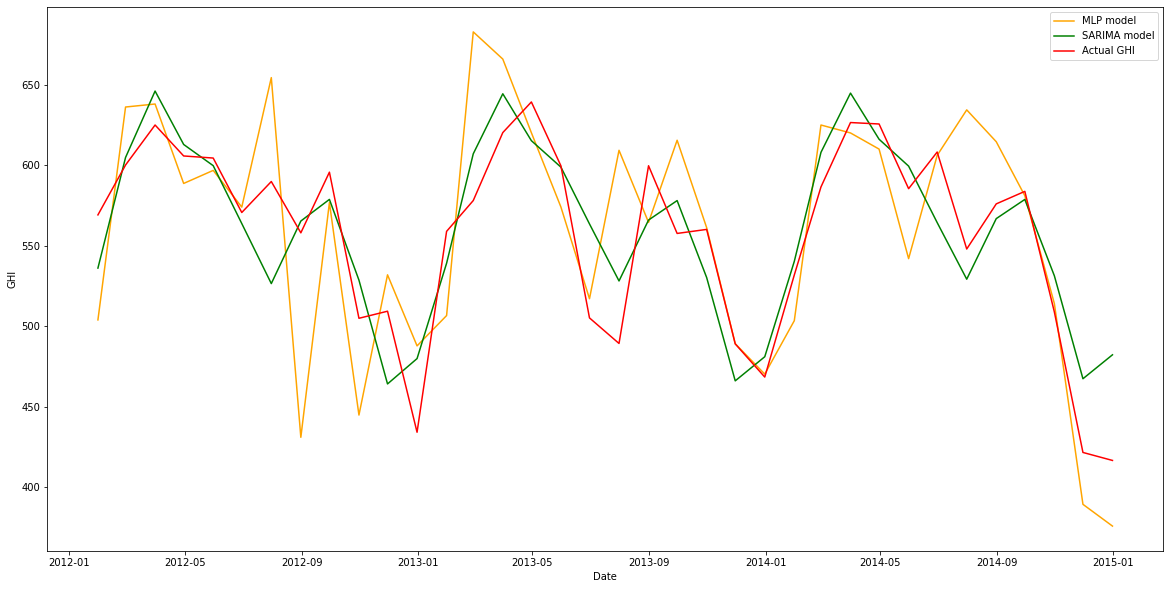

In [18]:
df1 = pd.read_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/TamilNadu1/MLP_monthly.csv')
#df2 = pd.read_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Gujarat1/LSTM_monthly.csv')

plt.figure(figsize = (20,10))
plt.plot(X_test.index,df1['GHI'],color='orange',label='MLP model')
#plt.plot(df1['Date'],df2['GHI'], color= 'blue', label= 'LSTM model')
plt.plot(X_test.index,pred , color= 'green', label= 'SARIMA model') 
plt.plot(X_test.index,X_test , color= 'red', label= 'Actual GHI') 
plt.xlabel('Date')
plt.ylabel('GHI')
plt.legend()
plt.show()

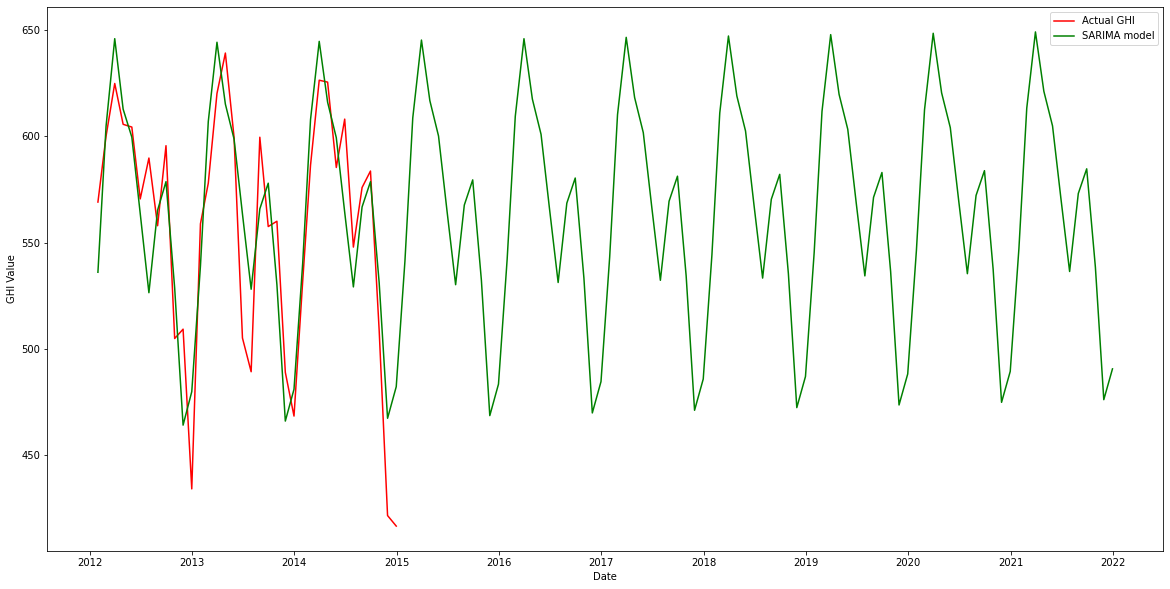

In [19]:
Fdates= pd.date_range('2012-01-01','2022-01-01' , freq='1M')
pred1=stepwise_model.predict(n_periods=120)
plt.figure(figsize = (20,10))
plt.plot(X_test.index,X_test , color= 'red', label= 'Actual GHI') 
plt.plot(Fdates,pred1 , color= 'green', label= 'SARIMA model') 
plt.xlabel('Date')
plt.ylabel('GHI Value')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(X_test,pred)

0.04598477929380278

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X_test, pred, squared=False)

29.464989742367216